In [1]:
import numpy as np
from matplotlib import pyplot as plt

import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

In [2]:
import os
data_path = os.getcwd()+'/'
print(data_path)

/Users/daxfeliz/Desktop/


In [3]:
df = pd.read_csv(data_path+'SRMP_target_list_B.csv')

In [4]:
df.head()

,Unnamed: 0,TIC ID,Observed Sectors [String],N Sectors Observed,dist,ra,dec,eclat,eclong,Teff,logg,M_star,R_star,rho,Tmag,Vmag,Gmag,rmag,imag,Zmag,Hmag,Kmag,Period [days],Depth,T0,Transit Duration [days]
0,0,396562848,"Sector 18, Sector 19, Sector 25, Sector 26",4.0,18.2276,44.326080,76.553125,55.862815,72.756004,3414.0,4.97292,NaN,0.260187,13.16950,11.0548,13.304,12.2598,12.9473,14.8547,12.3572,9.028,8.767,1.949521,0.002185,1792.603719,0.02816
1,1,436678563,Sector 5,1.0,25.8434,73.458537,15.820910,-6.703732,73.989733,3447.0,4.85850,0.305,0.305000,7.19430,10.9231,13.205,12.1101,NaN,NaN,NaN,8.892,8.617,585.700000,0.005100,NaN,NaN
2,2,458451774,Sector 22,1.0,39.2687,193.824762,44.523913,45.325426,169.956136,3476.0,4.82238,0.352,0.344000,5.98705,11.5210,13.713,12.6913,13.4846,12.1659,12.1208,9.435,9.242,0.103000,0.002800,NaN,NaN
3,3,116278838,"Sector 16, Sector 23",2.0,35.0873,220.977093,43.596289,55.243171,196.448635,3417.0,4.87830,0.384,0.371000,7.97433,11.7143,14.022,12.9231,14.2986,12.4380,12.2421,9.670,9.439,500.000000,0.015400,NaN,NaN
4,4,452989720,"Sector 17, Sector 18",2.0,38.2558,8.770342,59.885526,49.748397,39.877510,3203.0,4.94586,0.250,0.263000,11.40540,12.7315,16.350,14.0839,NaN,NaN,NaN,10.401,10.166,5.959000,0.004100,NaN,NaN


In [5]:
x=3
quarter_number = int(df['Observed Sectors [String]'][x].split(',')[0].split(' ')[-1])
quarter_number

16

Number of data products for  Kepler-10  in  Kepler  with  long  cadence and in Quarter  3 : 1
Filtered Data Product list:
SearchResult containing 1 data products.

 #       mission      year author exptime  target_name  distance
                                     s                   arcsec 
--- ----------------- ---- ------ ------- ------------- --------
  0 Kepler Quarter 03 2009 Kepler    1800 kplr011904151      0.0

TPF type: <class 'lightkurve.targetpixelfile.KeplerTargetPixelFile'>


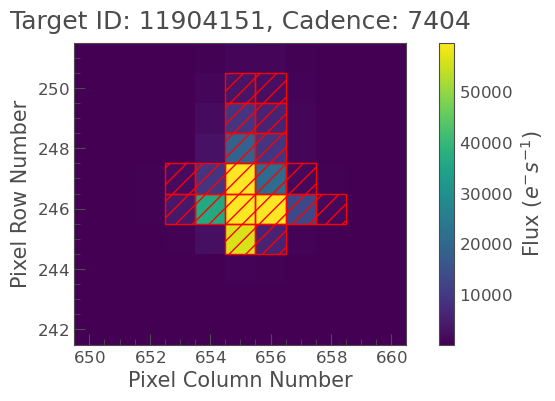

cadence 29.424 minutes
Npts for smoothing: 49
Best fit period:  0.837 days
Best fit planet Radius:  1.545 Earth Radii


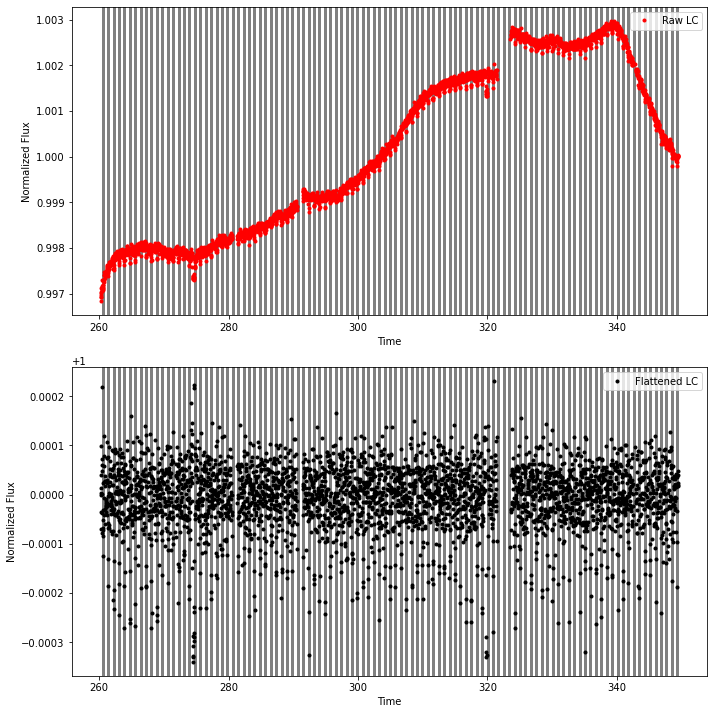

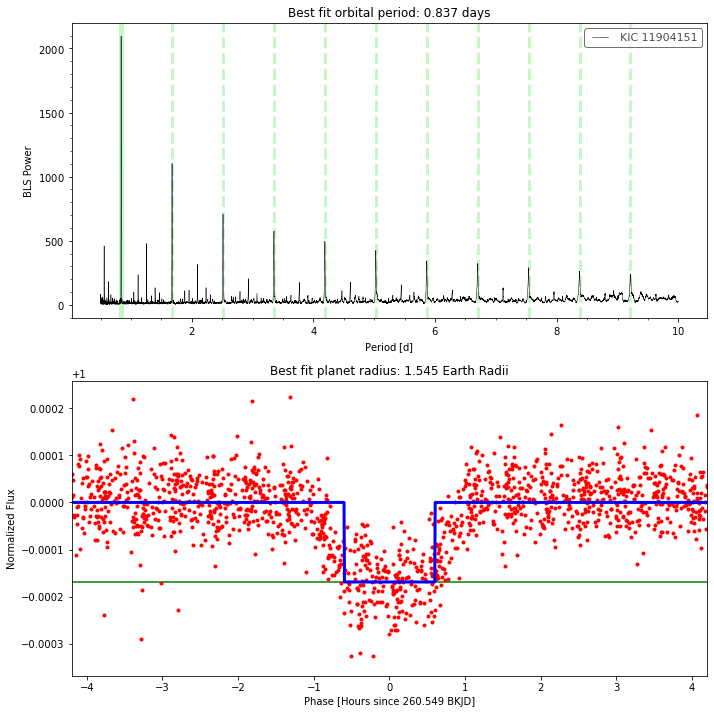

In [6]:
from planet_hunter_tools import everything

# cadence='short'
cadence='long'


starname='Kepler-10'
quarter_number=3
mission='Kepler'

smoothing_window=1#/24
Nsigma =  5#number of standard deviations above/below the median to consider a point an outlier
minP=0.5
maxP=10
Nfreq=0.5/1000

import os
cwd_path = os.getcwd()+'/SRMP_Planet_Hunting_Data/'
savepath= cwd_path+starname+'/'

lc = everything(savepath,starname, mission, quarter_number, cadence, \
           smoothing_window, Nsigma, minP, maxP, Nfreq)

In [8]:
cadence

'long'

TIC 396562848
Number of data products for  TIC 396562848  in  TESS  with  short  cadence and in Sector  18 : 2
Filtered Data Product list:
SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 18 2019   SPOC     120   396562848      0.0

TPF type: <class 'lightkurve.targetpixelfile.TessTargetPixelFile'>


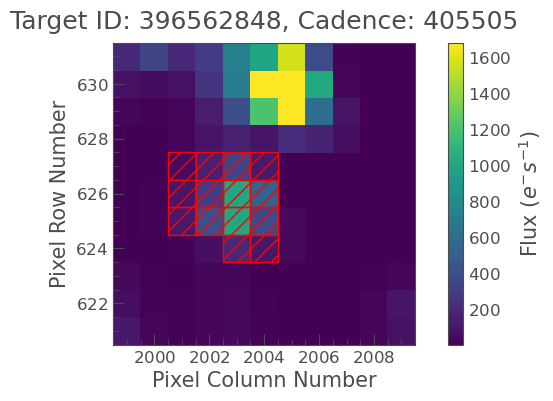

cadence 2.0 minutes
Npts for smoothing: 719
Best fit period:  9.75 days
Best fit planet Radius:  1.598 Earth Radii


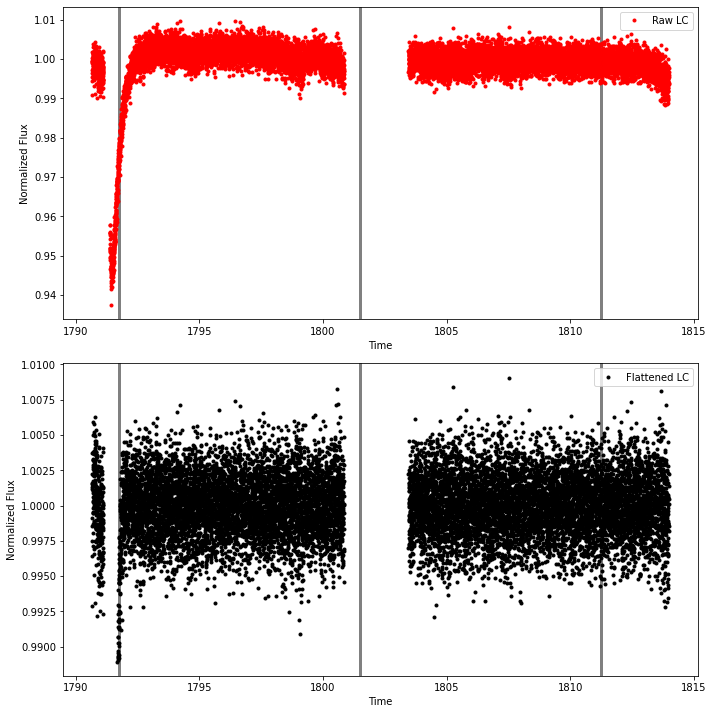

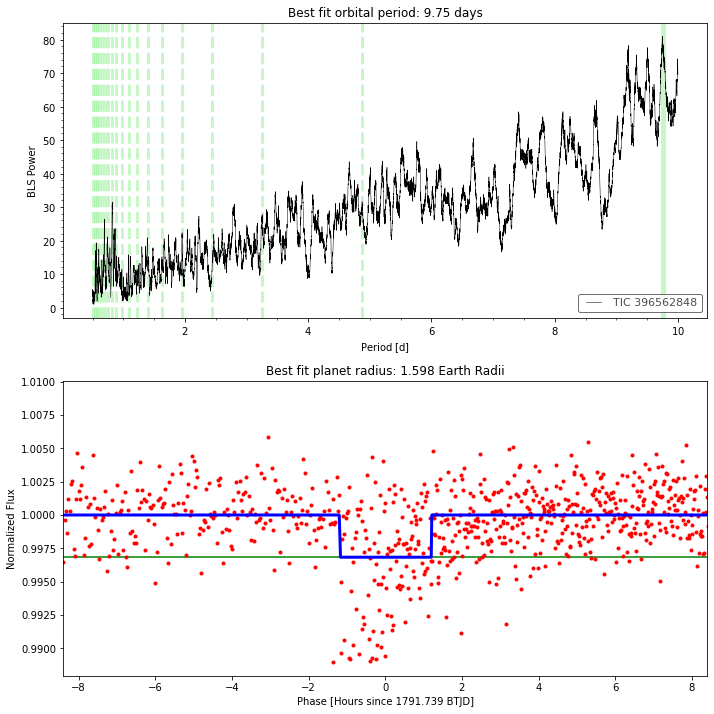

TIC 436678563
Number of data products for  TIC 436678563  in  TESS  with  short  cadence and in Sector  5 : 2
Filtered Data Product list:
SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 05 2018   SPOC     120   436678563      0.0

TPF type: <class 'lightkurve.targetpixelfile.TessTargetPixelFile'>


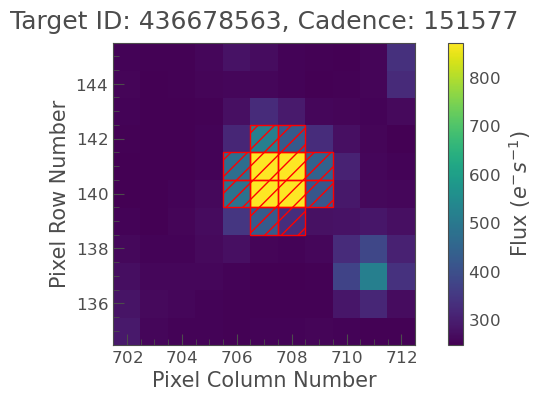

cadence 2.0 minutes
Npts for smoothing: 719
Best fit period:  0.515 days
Best fit planet Radius:  0.438 Earth Radii


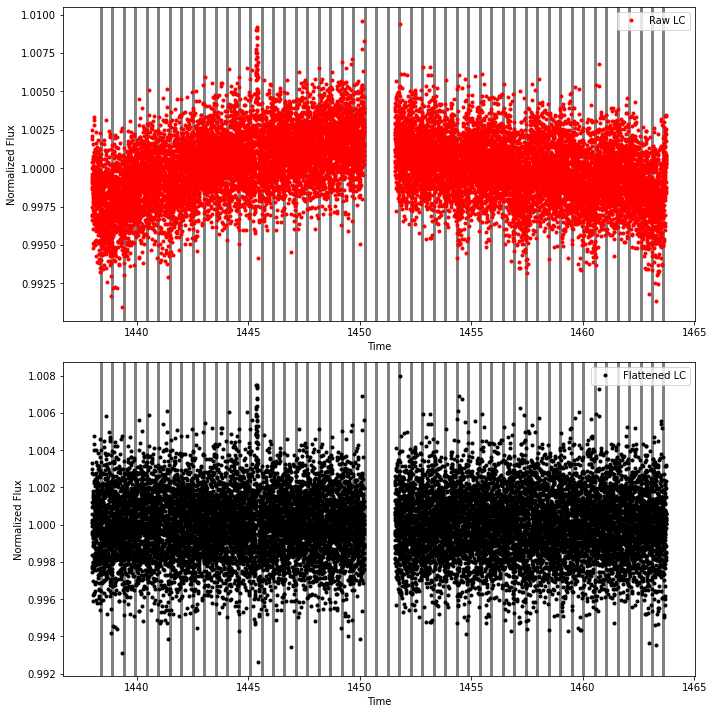

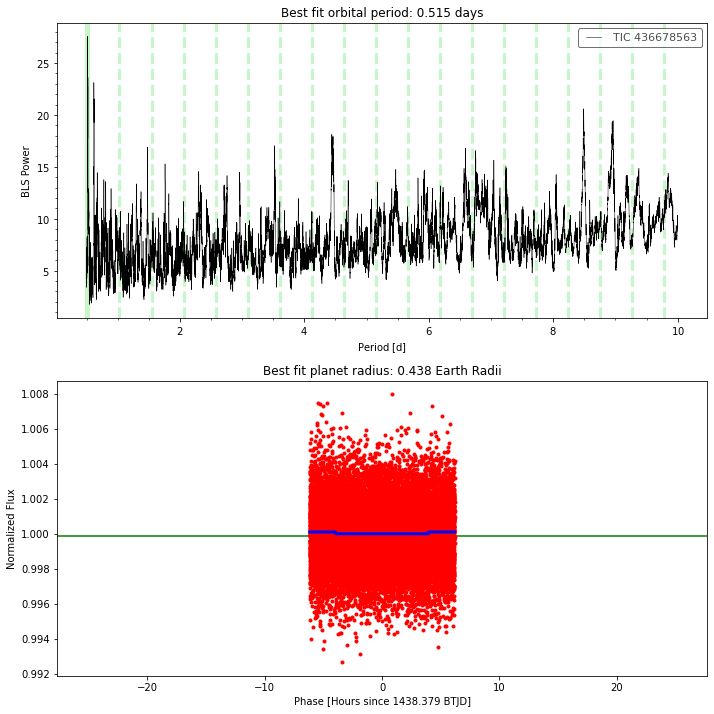

TIC 458451774
Number of data products for  TIC 458451774  in  TESS  with  short  cadence and in Sector  22 : 2
Filtered Data Product list:
SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 22 2020   SPOC     120   458451774      0.0

TPF type: <class 'lightkurve.targetpixelfile.TessTargetPixelFile'>


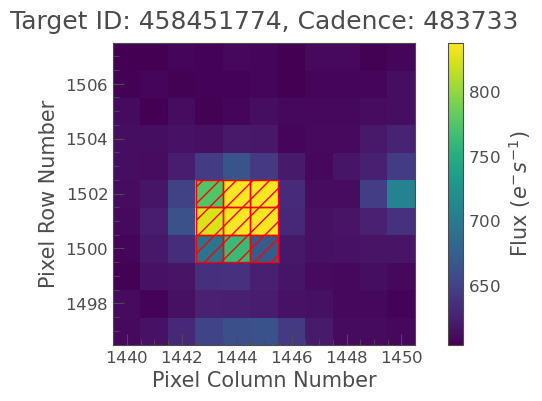

cadence 2.0 minutes
Npts for smoothing: 719
Best fit period:  9.492 days
Best fit planet Radius:  2.401 Earth Radii


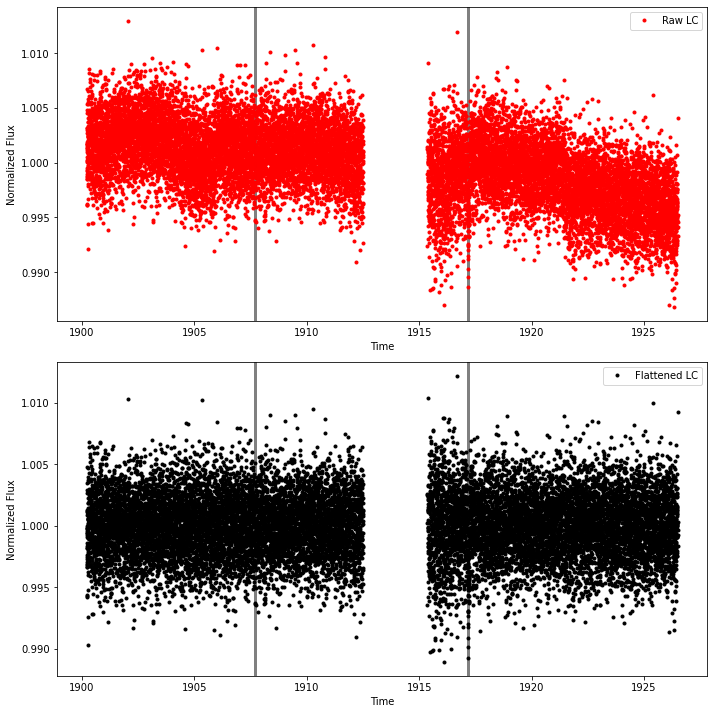

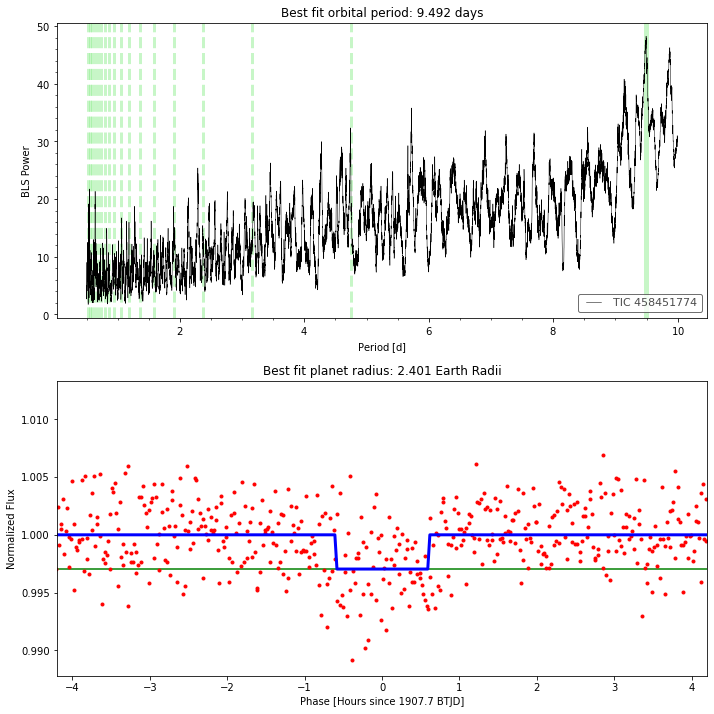

In [9]:


quarter_number=3
mission='TESS'

smoothing_window=24/24
Nsigma =  5#number of standard deviations above/below the median to consider a point an outlier
minP=0.5
maxP=10
Nfreq=0.5/1000

cadence='short'

import os
cwd_path = os.getcwd()+'/SRMP_Planet_Hunting_Data/'
savepath= cwd_path+starname+'/'


for x in range(3):#len(df)):
    ID = str(df['TIC ID'][x])
    starname ='TIC '+ ID
    print(starname)
    
    quarter_number = int(df['Observed Sectors [String]'][x].split(',')[0].split(' ')[-1]) 
    
    lc = everything(savepath,starname, mission, quarter_number, cadence, \
           smoothing_window, Nsigma, minP, maxP, Nfreq)

In [ ]:
# Note:

# check how many targets have short cadences vs long

# update code to do multi-sector light curves